# KNN_Project

In [38]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("KNN_Project_Data")

In [3]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [4]:
sns.set_style("whitegrid")

C:\Users\maury\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\maury\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


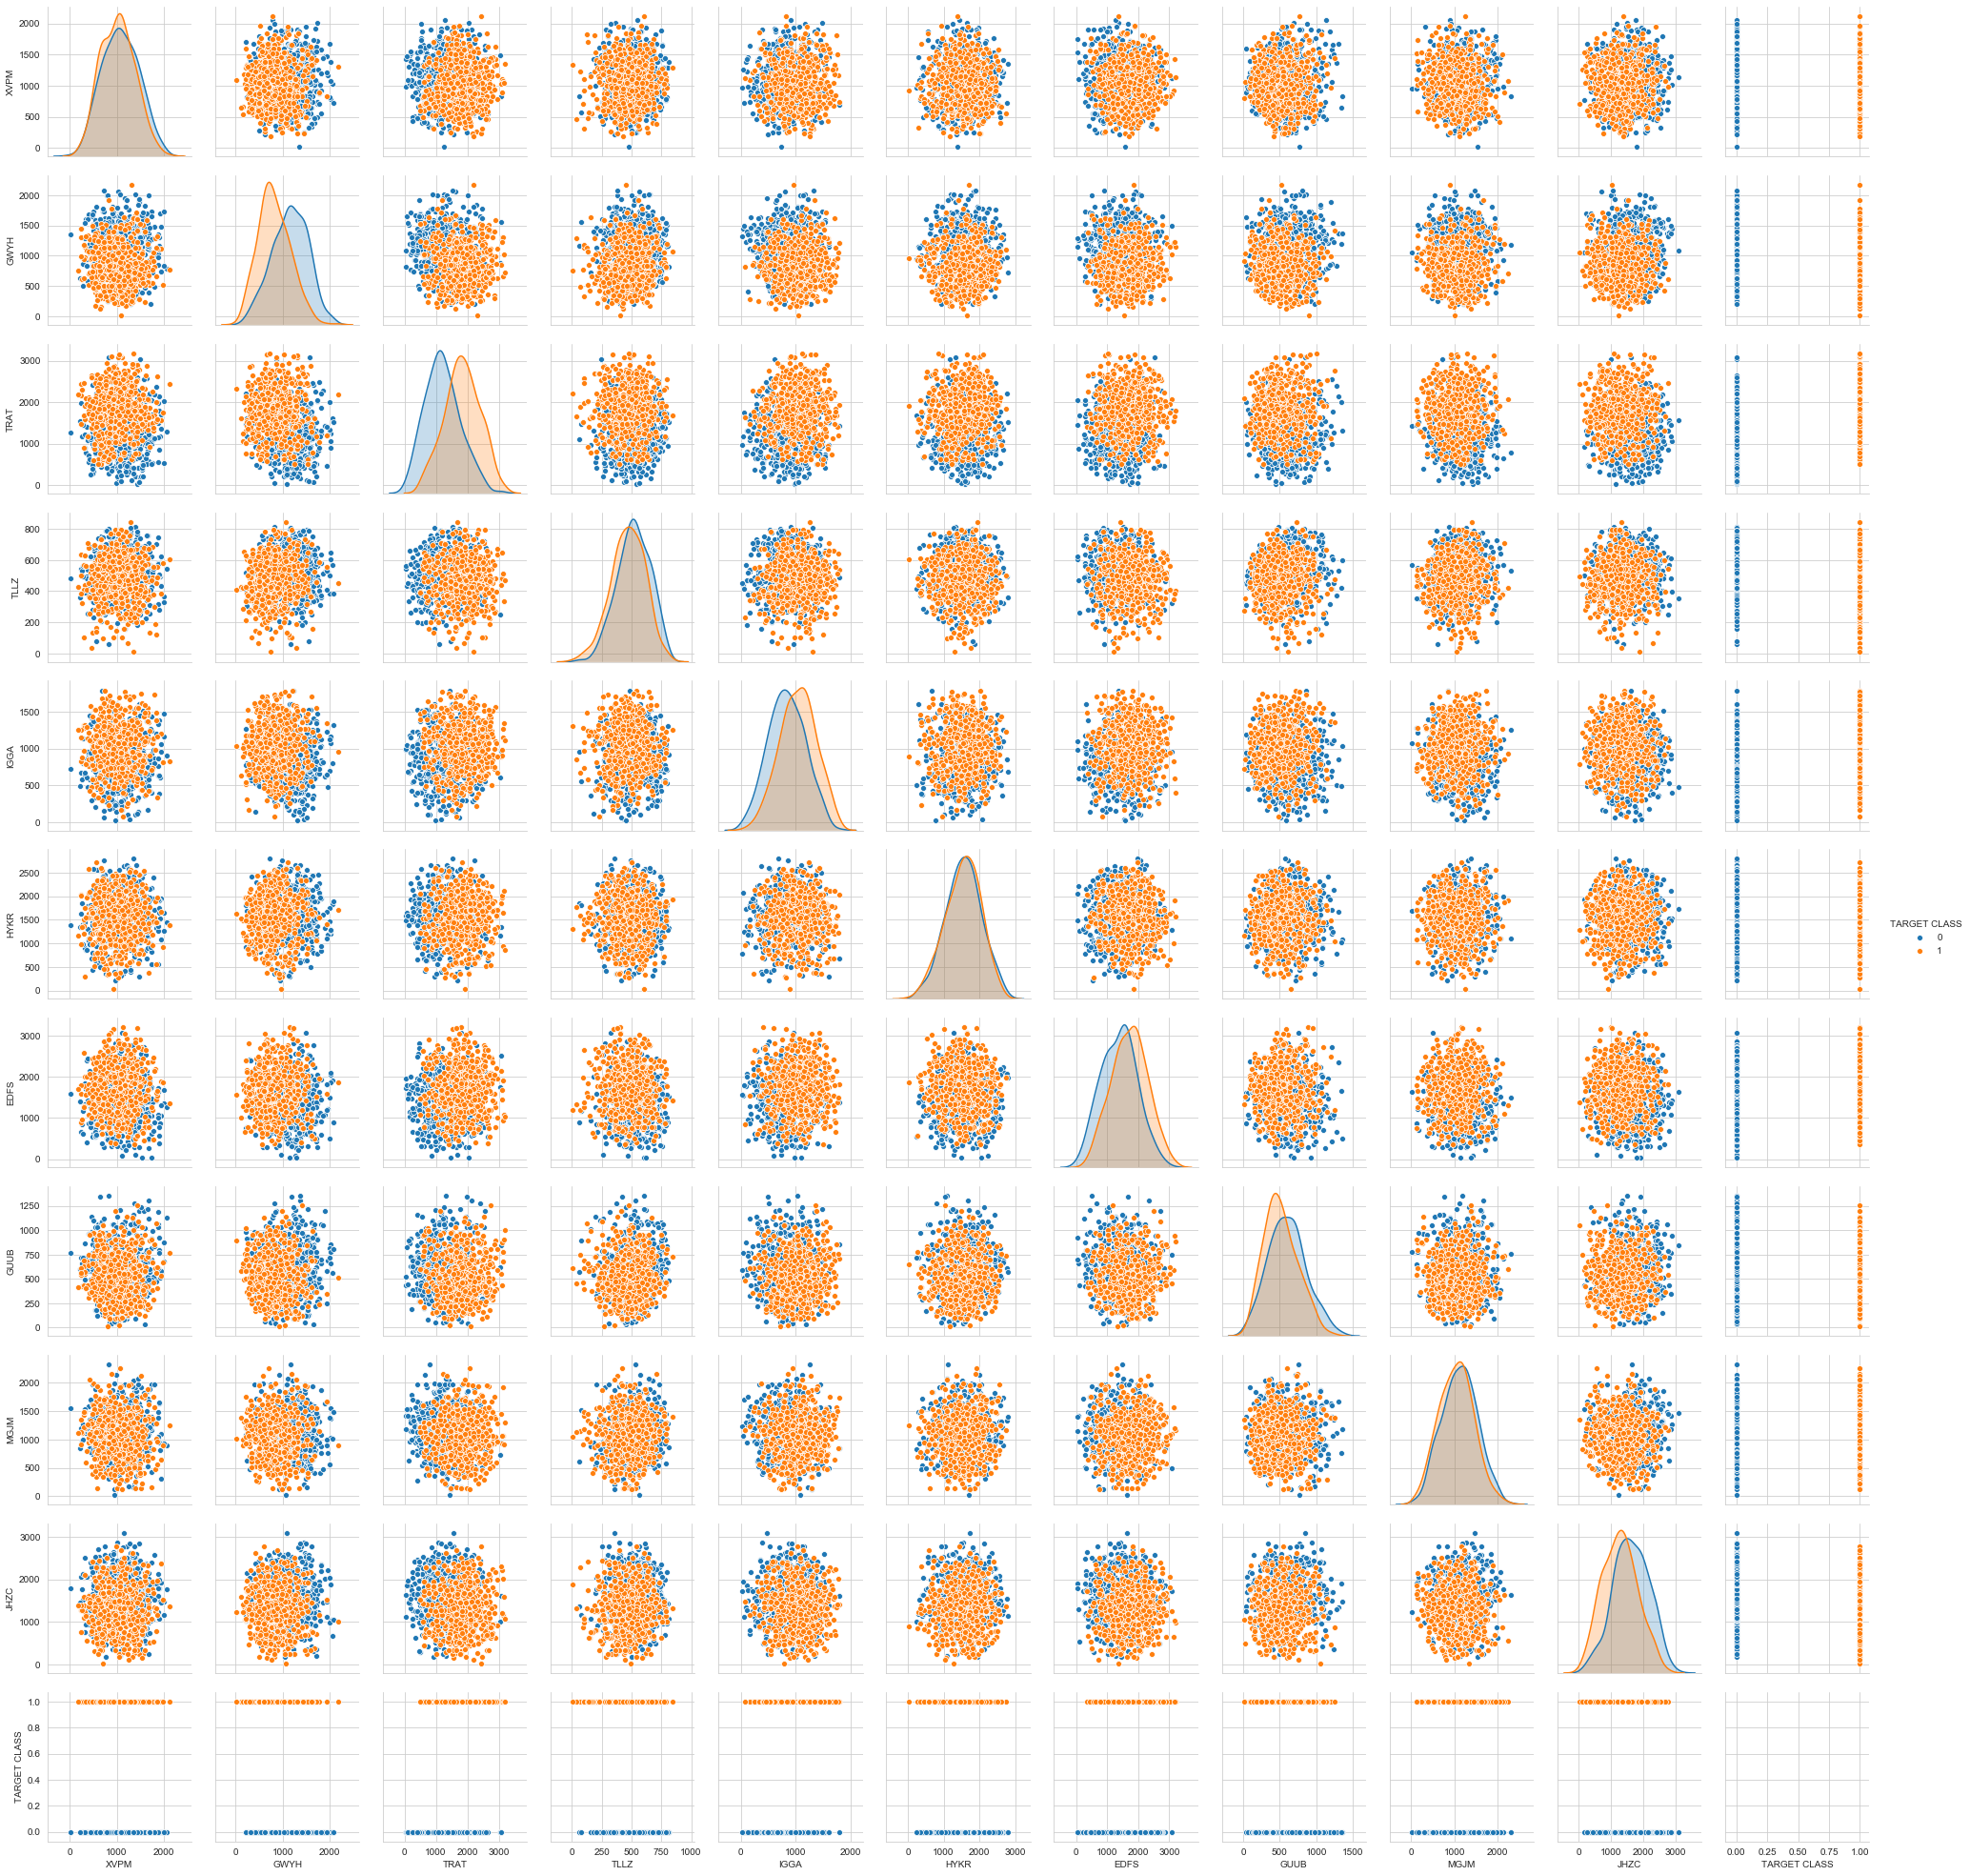

In [36]:
sns.pairplot(df,hue="TARGET CLASS")

In [7]:
#as we can see the head the values are very high and distinct to one another so we need to normalize  it first
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [12]:
#we do not want to normalise or classification column
scaler.fit(df.drop("TARGET CLASS",axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [13]:
scaled_feat = scaler.transform(df.drop("TARGET CLASS",axis=1))

In [16]:
norm_df= pd.DataFrame(data=scaled_feat,columns=df.columns[:-1])

In [18]:
norm_df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


In [19]:
X=norm_df

In [20]:
y=df["TARGET CLASS"]

In [22]:
#training and testing
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [21]:
#importing KNN class from neighnors family aka module.
from sklearn.neighbors import KNeighborsClassifier

In [24]:
#We will Plot Diffrent K'S Value to get least error point to model our ML model
error_rate =[]

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(y_test!=pred_i))
    

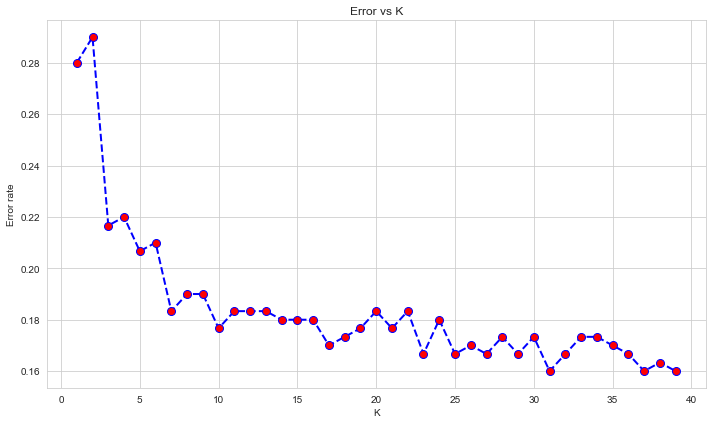

In [37]:
#ploting error rate
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color="Blue",ls="--",lw=2,marker="o",mfc="Red",markersize=8)
plt.title("Error vs K")
plt.xlabel("K")
plt.ylabel("Error rate")
plt.tight_layout()

In [ ]:
# As We can See Somewhere around 30 the model looks stable and precicse contrast to other So choosing K=31

In [33]:
knn = KNeighborsClassifier(n_neighbors=31)
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)

In [34]:
#Evaluation
from sklearn.metrics import classification_report,confusion_matrix

In [35]:
print("K=31")
print(classification_report(y_test,predictions))
print("\n")
print(confusion_matrix(y_test,predictions))

K=31
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       152
           1       0.82      0.87      0.84       148

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



[[123  29]
 [ 19 129]]


# Created By Ratnakar Maurya